# Preprocesamiento de Datos

Comenzaremos importando las siguientes bibliotecas 

- NumPy
- Pandas
- Matplotlib
- SciPy


In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
%matplotlib notebook
%matplotlib inline


Se prosigue importando los datos de la hoja de Excell a un arreglo *numpy* para graficarlos. 

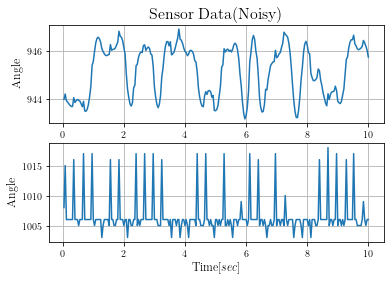

In [47]:
#data = pd.read_csv('d.txt',sep=" ", header = None)
data = pd.read_csv('d_iir.txt',sep=" ", header = None)
data.columns=["Time","Angle","Filt_Angle"]
time=data['Time']/1000
angle=data['Angle']
ufilt_angle=data['Filt_Angle']
plt.subplot(2,1,1)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.plot(time[:],np.round(ufilt_angle[:]))#min(1008) max(1012);min(1010) max(1013);min(1009) max(1012);min(1009) max(1012)
plt.plot(time[:],ufilt_angle[:])
plt.title(r'Sensor Data(Noisy)',fontsize=16)
plt.xlabel(r'Time$[sec]$',fontsize=12)
plt.ylabel(r'Angle',fontsize=12)
plt.grid(True)
plt.subplot(2,1,2)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.plot(time[:],angle[:])
plt.xlabel(r'Time$[sec]$',fontsize=12)
plt.ylabel(r'Angle',fontsize=12)
plt.grid(True)
plt.show()


# Análisis de Fourier

Usaremos la transformada rápida de fourier(**fft**) para observar las componentes en frecuencia de la señales de luz roja e infrarroja y asi decidir las frecuencias de corte de los filtros a utilizar.

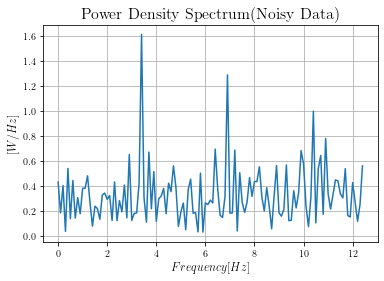

In [46]:
T=0.04
N_r= len(time)
yf_r = fft(angle)[1:]
xf_r = fftfreq(N_r, T)[0:N_r//2]
yf_filt = fft(ufilt_angle)[1:]
xf_filt = fftfreq(N_r, T)[0:N_r//2]

plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.plot(xf_r, 2.0/N_r * np.abs(yf_r[0:N_r//2]))
plt.title(r'Power Density Spectrum(Noisy Data)',fontsize=16)
plt.ylabel(r'$[W/Hz]$',fontsize=12)
plt.xlabel(r'$Frequency[Hz]$',fontsize=12)
plt.grid(True)
plt.show()

## Diseño del Filtro



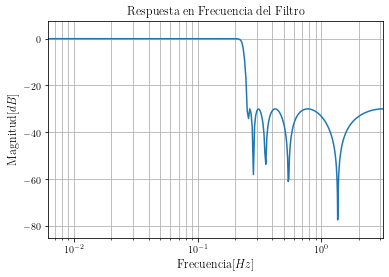

[ 0.02356827 -0.18540445  0.68132212 -1.55438439  2.46317437 -2.85654513
  2.46317437 -1.55438439  0.68132212 -0.18540445  0.02356827] [  1.          -8.13017165  29.89940808 -65.47103164  94.49811511
 -93.91494029  65.06937804 -31.02952442   9.74545527  -1.82023081
   0.15354904]


In [39]:
#sos = signal.butter(4, 1, 'low', fs=1/T, output='sos')
sos = signal.cheby2(10, 30,1, 'low',analog=False, output='sos', fs=1/T)
num,den=signal.sos2tf(sos)
w,h = signal.freqz(num,den)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.semilogx(w,20*np.log10(abs(h)))
plt.title('Respuesta en Frecuencia del Filtro')
plt.margins(0,0.1)
plt.xlabel(r'Frecuencia$[Hz]$',fontsize=12)
plt.ylabel(r'Magnitud$[dB]$',fontsize=12)
plt.grid(which='both',axis='both')
plt.show()
print(num,den)

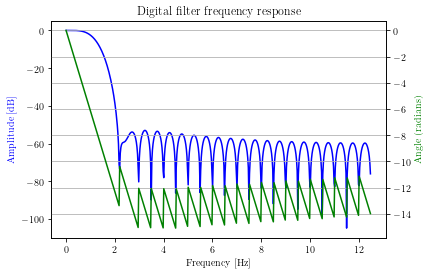

[ 0.00102385  0.00100839  0.00094825  0.00076164  0.0003372  -0.00043639
 -0.00163258 -0.00324784 -0.00516932 -0.00715712 -0.00884692 -0.00977619
 -0.00943276 -0.00732118 -0.00303818  0.00365339  0.01276384  0.02403952
  0.03695727  0.05075386  0.06448905  0.0771359   0.08768775  0.09526827
  0.0992303   0.0992303   0.09526827  0.08768775  0.0771359   0.06448905
  0.05075386  0.03695727  0.02403952  0.01276384  0.00365339 -0.00303818
 -0.00732118 -0.00943276 -0.00977619 -0.00884692 -0.00715712 -0.00516932
 -0.00324784 -0.00163258 -0.00043639  0.0003372   0.00076164  0.00094825
  0.00100839  0.00102385]


In [40]:
fs=1/T
#b = signal.firwin(50, 0.1, window=('blackman'),fs=fs)
b = signal.firwin(50, cutoff = 0.1, window = "hamming")
w, h = signal.freqz(b,fs=fs)
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
#ax1.plot(w*(fs)/(2*np.pi), 20 * np.log10(abs(h)), 'b')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
#ax2.plot(w*(fs)/(2*np.pi), angles, 'g')
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
print(b)

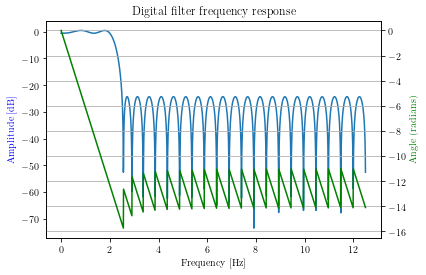

[ 0.03138181  0.00042372 -0.0035203  -0.00882821 -0.01369309 -0.01621873
 -0.01497537 -0.00960664 -0.0010932   0.00836272  0.01584683  0.01853028
  0.01459482  0.00405724 -0.01088885 -0.02611649 -0.03667689 -0.03748184
 -0.02523303  0.00085767  0.03834576  0.08196561  0.12447044  0.15821672
  0.17687259  0.17687259  0.15821672  0.12447044  0.08196561  0.03834576
  0.00085767 -0.02523303 -0.03748184 -0.03667689 -0.02611649 -0.01088885
  0.00405724  0.01459482  0.01853028  0.01584683  0.00836272 -0.0010932
 -0.00960664 -0.01497537 -0.01621873 -0.01369309 -0.00882821 -0.0035203
  0.00042372  0.03138181]


In [41]:
#fs = 22050.0       # Sample rate, Hz
cutoff = 2    # Desired cutoff frequency, Hz
trans_width =0.5   # Width of transition from pass band to stop band, Hz
numtaps = 50      # Size of the FIR filter.
taps = signal.remez(numtaps, [0, cutoff, cutoff + trans_width, 0.5*fs], [1, 0], Hz=fs)
w, h = signal.freqz(taps, [1], worN=2000)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
angles = np.unwrap(np.angle(h))
ax2 = ax1.twinx()
ax2.set_ylabel('Angle (radians)', color='g')
#ax2.plot(w*(fs)/(2*np.pi), angles, 'g')
ax2.plot(0.5*fs*w/np.pi, angles, 'g')
ax2.grid()
ax2.axis('tight')
plt.show()
print(taps)
#plot_response(fs, w, h, "Low-pass Filter")

## Filtrado de la Señal

Una vez obtenida la función de transferencia del filtro se usara la función *lfilter* para obtener las señales filtradas, esto se muestra a continuación.


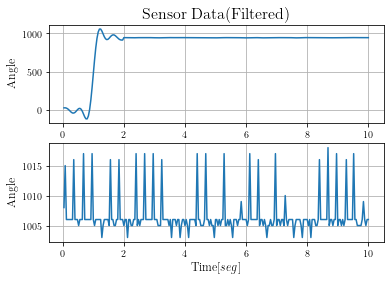

1018
946.929
1003
943.159


In [42]:
#angle_filt = signal.lfilter(num,den, angle,axis=0, zi=None)
#angle_filt = signal.lfilter(b,1, angle,axis=0, zi=None)
angle_filt = signal.lfilter(taps,1, angle,axis=0, zi=None)
yf_rf = fft(angle_filt)
xf_rf = fftfreq(N_r, T)[:N_r//2]
plt.subplot(2,1,1)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.plot(time[31:],angle_filt[31:])
plt.plot(time[:],angle_filt[:])
#plt.plot(time[:],ufilt_angle[:])
plt.title(r'Sensor Data(Filtered)',fontsize=16)
plt.xlabel(r'Time$[seg]$',fontsize=12)
plt.ylabel(r'Angle',fontsize=12)
plt.grid(True)
plt.subplot(2,1,2)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.plot(time[:],angle[:])
#plt.title(r'Power Density Spectrum(Filtered Data)',fontsize=16)
plt.xlabel(r'Time$[seg]$',fontsize=12)
plt.ylabel(r'Angle',fontsize=12)
plt.grid(True)
plt.show()
print(np.max(angle))
print(np.max(ufilt_angle))
print(np.min(angle))
print(np.min(ufilt_angle))

#### Filtrado sin Bibliotecas


In [43]:
input=angle.to_numpy()
my_ang_filt_iir=np.zeros(N_r)
#print(len(num))
num=1/den[0]*num
den=1/den[0]*den
for i in range(len(num)-1,N_r):
    #print(i)
    #print(np.flip(num).shape)
    #print(input[i-(len(num)-1):i+1].shape)
    #print(np.flip(den[1:]).shape)
    #print(my_ang_filt_iir[i-len(num)+1:i].shape)
    my_ang_filt_iir[i]=np.flip(num)@input[i-(len(num)-1):i+1]-np.flip(den[1:])@my_ang_filt_iir[i-len(num)+1:i]


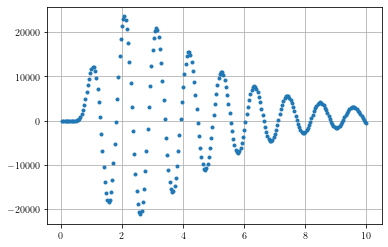

In [44]:
plt.plot(time[:],my_ang_filt_iir[:],'.')
plt.show
plt.grid(True)

In [45]:
digital_input=np.arange(23,164+1,1)
digital_angle=np.arange(1012,434-1,-4)
print(len(digital_input))
print(len(digital_angle))
for i in range(0,145,1):
     print('%5i %5i'% (i+23,digital_angle[i]))

142
145
   23  1012
   24  1008
   25  1004
   26  1000
   27   996
   28   992
   29   988
   30   984
   31   980
   32   976
   33   972
   34   968
   35   964
   36   960
   37   956
   38   952
   39   948
   40   944
   41   940
   42   936
   43   932
   44   928
   45   924
   46   920
   47   916
   48   912
   49   908
   50   904
   51   900
   52   896
   53   892
   54   888
   55   884
   56   880
   57   876
   58   872
   59   868
   60   864
   61   860
   62   856
   63   852
   64   848
   65   844
   66   840
   67   836
   68   832
   69   828
   70   824
   71   820
   72   816
   73   812
   74   808
   75   804
   76   800
   77   796
   78   792
   79   788
   80   784
   81   780
   82   776
   83   772
   84   768
   85   764
   86   760
   87   756
   88   752
   89   748
   90   744
   91   740
   92   736
   93   732
   94   728
   95   724
   96   720
   97   716
   98   712
   99   708
  100   704
  101   700
  102   696
  103   692
  104   688
  105   